In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats

In [6]:
training = pd.read_csv('development_dataset.csv')

In [69]:
Y=training['VAR2']

In [70]:
len(Y)

34000

In [71]:
pd.set_option('display.max_columns', 50)

In [7]:
training.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


In [8]:
training.loc[1,'VAR2']

911.7647059000001

# VAR5 filled with mean

In [73]:
training['VAR5'].describe()

count    33999.000000
mean       631.571391
std         30.863288
min        347.053355
25%        611.691167
50%        619.802909
75%        637.450565
max       1000.000000
Name: VAR5, dtype: float64

In [74]:
training['VAR5'].median()

619.8029092999999

In [75]:
#replacing var5 by mean value
training['VAR5']=training['VAR5'].replace(np.NaN, training['VAR5'].mean())

# Drop  Var 8 and 16 by correlation with 7

In [76]:
training.drop(columns=['VAR8', 'VAR16'], inplace=True)

# Drop  Var15 by correlation with 11 and 13

In [77]:
training.drop(columns=['VAR15'], inplace=True)

# FIlling VAR10 with mean value

In [78]:
#replacing var10 by mean value
training['VAR10']=training['VAR10'].replace(np.NaN, training['VAR10'].mean())

# Replacing outliers of VAR10

In [79]:
z = np.abs(stats.zscore(training['VAR10']))

In [80]:
z

array([3.34393094e-01, 8.34573463e-13, 3.34393094e-01, ...,
       3.34393094e-01, 3.34393094e-01, 3.34393094e-01])

In [81]:
outliers=np.where(z >3)

In [82]:
outliers=outliers[0]

In [83]:
len(outliers)

6

In [84]:
training['VAR10'].loc[outliers] = np.nan

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [85]:
training['VAR10'].isnull().sum()

6

In [86]:
training['VAR10']=training['VAR10'].replace(np.NaN, training['VAR10'].mean())

# Filling missing of VAR11

In [87]:
training['VAR11'].median()

2.098359565

In [88]:
training['VAR11']=training['VAR11'].replace(np.NaN, training['VAR11'].median())

# Replacing outliers of VAR11

In [89]:
z = np.abs(stats.zscore(training['VAR11']))
z

array([0.43322444, 0.25447075, 0.41613218, ..., 0.34544787, 0.33259042,
       2.42390645])

In [90]:
outliers=np.where(z >3)

In [91]:
print(outliers)

(array([  145,   192,   241,   406,   422,   536,   542,   564,   617,
         908,   934,  1031,  1155,  1261,  1276,  1311,  1748,  1880,
        1886,  1922,  2214,  2276,  2335,  2450,  2536,  2572,  2678,
        2739,  2821,  2867,  2870,  2988,  3082,  3128,  3129,  3153,
        3161,  3204,  3436,  3473,  3565,  3599,  3628,  3636,  3691,
        3710,  3722,  3851,  3865,  3886,  3993,  4126,  4219,  4222,
        4294,  4405,  4416,  4449,  4471,  4519,  4774,  4847,  5078,
        5109,  5133,  5153,  5181,  5208,  5227,  5228,  5255,  5309,
        5367,  5373,  5394,  5474,  5706,  5753,  5814,  5853,  5865,
        5942,  5973,  6129,  6189,  6208,  6262,  6505,  6546,  6586,
        6689,  6707,  6783,  6909,  6963,  7082,  7137,  7151,  7303,
        7335,  7467,  7510,  7538,  7657,  7726,  7763,  7848,  7889,
        7957,  7966,  7995,  8115,  8380,  8566,  8621,  8654,  8669,
        8810,  8874,  8875,  8889,  8891,  8910,  9039,  9062,  9089,
        9103,  9104

In [92]:
for i in outliers:
    print(training['VAR11'].loc[i])

145       56.040337
192       35.913964
241       44.247113
406       47.418907
422       39.319987
536       69.762140
542       50.656534
564       81.574768
617       53.217808
908       36.792670
934       60.252302
1031      48.767456
1155      46.688500
1261      38.617993
1276      36.012368
1311      63.866221
1748      43.689260
1880      35.253549
1886      40.812678
1922      35.748341
2214      43.018450
2276      43.692032
2335      59.478237
2450      40.175131
2536      36.363019
2572      97.694992
2678      46.825018
2739     115.614900
2821      68.811364
2867      54.684858
            ...    
31782     74.860433
32130     49.656556
32261     38.988047
32349     42.044806
32364    352.525100
32382     41.543084
32410     44.747448
32414     45.219371
32478     35.561235
32606     96.723427
32652     53.188010
32669     38.590274
32670    115.301670
32833     40.710116
32875     57.345229
32945     75.163960
32947     46.097384
32951     40.916626
32964     41.480716


In [93]:
training['VAR11'].loc[outliers] = np.nan

In [94]:
training['VAR11'].isnull().sum()

462

In [95]:
training['VAR11']=training['VAR11'].replace(np.NaN, training['VAR11'].mean())

# Filling missing of VAR2

In [96]:
training['VAR2'].mean()

917.3916031483315

In [97]:
training['VAR2']=training['VAR2'].replace(np.NaN, training['VAR2'].mean())

# Filling missing VAR4 using VAR2,11 and training

In [98]:
training['VAR11'].describe()

count    34000.000000
mean         3.960637
std          5.430415
min          0.000693
25%          0.943846
50%          2.098360
75%          4.060201
max         35.186330
Name: VAR11, dtype: float64

In [99]:
X = training[['VAR2','VAR4','VAR11']].dropna()
y = X[['VAR4']]
X = X.drop(columns=['VAR4'])

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

In [101]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
y_pred = lreg.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

41815.016469341805

In [104]:
null_var4=training['VAR4'].isnull()
null_var4

0        False
1         True
2        False
3         True
4         True
5        False
6        False
7         True
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16        True
17       False
18       False
19        True
20       False
21       False
22        True
23        True
24        True
25       False
26       False
27       False
28       False
29       False
         ...  
33970     True
33971    False
33972    False
33973    False
33974     True
33975     True
33976     True
33977    False
33978     True
33979    False
33980    False
33981     True
33982     True
33983    False
33984    False
33985    False
33986    False
33987    False
33988    False
33989    False
33990    False
33991     True
33992     True
33993    False
33994    False
33995     True
33996     True
33997    False
33998    False
33999    False
Name: VAR4, Length: 34000, dtype: bool

In [105]:
x=training[['VAR2', 'VAR11']]
y=lreg.predict(x)

In [106]:
y.mean()

206.3154918197599

In [107]:
training['VAR4'].mean()

248.07620132529897

In [1]:
# x=training[['VAR2', 'VAR11']]
# y=lreg.predict(x)
# for i in range (len(null_var4)):
#     if null_var4[i]==True:
#         training['VAR4'].loc[i]=y[i]

In [109]:
training['VAR4'].describe()

count    28536.000000
mean       220.668739
std        221.395772
min        -25.384312
25%         71.428571
50%        142.857143
75%        285.714286
max       1000.000000
Name: VAR4, dtype: float64

# VAR3

In [110]:
training["VAR3"].describe()

count    30615.000000
mean         1.119596
std         12.714724
min          0.001333
25%          0.083333
50%          0.166667
75%          0.555556
max       1000.000000
Name: VAR3, dtype: float64

In [111]:
training["VAR3"].mean()

1.1195956999950352

In [112]:
training['VAR3']=training['VAR3'].replace(np.NaN, 0)
#np.NaN, training['VAR3'].mean()

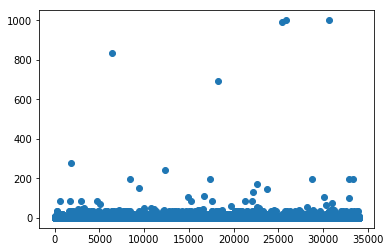

In [113]:
plt.scatter(training['VAR1'], training['VAR3'])
plt.show()

In [114]:
z = np.abs(stats.zscore(training['VAR3']))
z

array([0.07201869, 0.08122451, 0.01448232, ..., 0.06971724, 0.06884176,
       0.07201869])

In [115]:
outliers=np.where(z >3)

In [116]:
print(outliers)

(array([  581,  1772,  1833,  2575,  3003,  3047,  3324,  4736,  5026,
        6367,  7220,  8479,  9424,  9972, 10818, 11045, 11077, 12200,
       12290, 14954, 15232, 15981, 16172, 16623, 16693, 17394, 17575,
       18274, 18688, 19740, 21272, 22046, 22202, 22586, 22662, 22805,
       23717, 24569, 25435, 25814, 27284, 28196, 28805, 28860, 30112,
       30376, 30617, 30893, 31011, 31021, 31221, 32840, 32889, 33337],
      dtype=int64),)


In [117]:
for i in outliers:
    print(training['VAR3'].loc[i])

581        83.333333
1772       83.333333
1833      278.111111
2575       44.444444
3003       83.333333
3047       44.444444
3324       50.000000
4736       83.333333
5026       72.222222
6367      833.333333
7220       41.666667
8479      194.444444
9424      150.000000
9972       50.000000
10818      49.014444
11045      41.666667
11077      44.444444
12200      41.666667
12290     243.286667
14954     105.555556
15232      86.083333
15981      41.666667
16172      41.666667
16623      44.166667
16693     113.333333
17394     194.444444
17575      84.113333
18274     694.444444
18688      41.666667
19740      58.936667
21272      83.333333
22046      83.333333
22202     132.377778
22586     173.144444
22662      55.555556
22805      50.000000
23717     147.682222
24569      41.666667
25435     993.333333
25814    1000.000000
27284      41.666667
28196      55.555556
28805     194.444444
28860      38.177778
30112     105.555556
30376      66.666667
30617    1000.000000
30893      38

In [118]:
training['VAR3'].loc[outliers] = np.nan

In [119]:
training['VAR3'].isnull().sum()

54

In [120]:
training['VAR3']=training['VAR3'].replace(np.NaN, training['VAR3'].median())

In [121]:
training['VAR3']=training['VAR3'].replace(0, training['VAR3'].median())

# VAR6

In [122]:
#for outlier analysis wrto other factors as well

In [123]:
training['VAR6'].describe()

count    30505.000000
mean        15.290028
std         29.123815
min          0.005000
25%          6.636364
50%         10.000000
75%         18.181818
max        909.090818
Name: VAR6, dtype: float64

In [124]:
training['VAR6'].median()

10.0

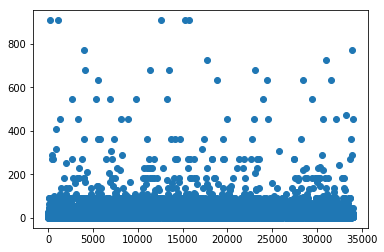

In [125]:
plt.scatter(training['VAR1'], training['VAR6'])
plt.show()

In [126]:
training['VAR6']=training['VAR6'].replace(np.NaN, 0)

In [127]:
z = np.abs(stats.zscore(training['VAR6']))
z

array([0.4253997 , 0.19791555, 0.19791555, ..., 0.15955953, 0.49039517,
       0.06792461])

In [128]:
outliers=np.where(z >6)

In [129]:
print(outliers)

(array([  136,   403,   453,   500,   820,   831,  1103,  1254,  1718,
        1986,  2621,  2682,  2742,  3190,  3368,  3415,  3448,  3793,
        3960,  3963,  4009,  4024,  4147,  4286,  5277,  5567,  5602,
        5612,  5757,  6440,  6742,  6899,  6998,  7084,  7089,  7366,
        7505,  7635,  8053,  8164,  8214,  8927,  9753, 10575, 10642,
       10775, 11035, 11069, 11077, 11232, 11245, 11322, 11366, 11377,
       11542, 11560, 11781, 11861, 12191, 12563, 12869, 13225, 13450,
       13708, 14074, 14119, 14194, 14429, 14564, 14714, 15271, 15566,
       15579, 15726, 15807, 15859, 15912, 16237, 16288, 16444, 17140,
       17433, 17595, 17719, 17735, 18250, 18279, 18543, 18647, 18811,
       19462, 19468, 19618, 19957, 20646, 21114, 21354, 21769, 21845,
       22000, 22625, 22729, 22989, 23042, 23088, 23284, 23344, 23489,
       23953, 24459, 24586, 25735, 27460, 27493, 27546, 27854, 28260,
       28407, 28437, 28709, 28816, 28860, 29407, 29490, 29799, 29998,
       30072, 30118

In [130]:
for i in outliers:
    print(training['VAR6'].loc[i])

136      909.090818
403      290.860546
453      272.727273
500      272.727273
820      318.181818
831      409.090909
1103     909.090818
1254     454.545455
1718     181.818182
1986     254.545455
2621     545.454545
2682     272.727273
2742     181.818182
3190     181.818182
3368     454.545455
3415     227.272727
3448     181.818182
3793     272.727273
3960     181.818182
3963     181.818182
4009     363.636364
4024     772.727273
4147     681.818182
4286     213.347273
5277     545.454545
5567     636.363636
5602     363.636364
5612     363.636364
5757     363.636364
6440     272.727273
            ...    
28437    218.181818
28709    181.818182
28816    227.272636
28860    181.818182
29407    181.818182
29490    545.454545
29799    181.818182
29998    181.818182
30072    181.818182
30118    227.272727
30302    236.363636
30399    181.818182
30622    290.909091
30640    454.545455
30711    218.181818
30869    181.818182
31017    727.272727
31287    181.818182
31587    636.363636


In [131]:
training['VAR6'].loc[outliers] = np.nan

In [132]:
training['VAR6'].isnull().sum()

148

In [133]:
training['VAR6']=training['VAR6'].replace(np.NaN, training['VAR6'].median())

In [134]:
training['VAR6']=training['VAR6'].replace(0, training['VAR6'].median())

# VAR7

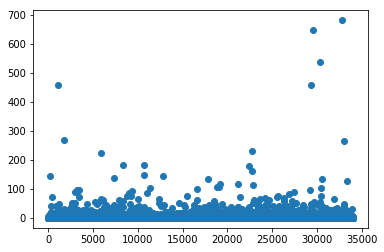

In [135]:
plt.scatter(training['VAR1'], training['VAR7'])
plt.show()

In [136]:
training['VAR7'].median()

0.998092503

In [137]:
training['VAR7']=training['VAR7'].replace(np.NaN, 0)

z = np.abs(stats.zscore(training['VAR6']))
z

outliers=np.where(z >4)

print(outliers)

for i in outliers:
    print(training['VAR7'].loc[i])

training['VAR7'].loc[outliers] = np.nan

(array([  112,   116,   148,   258,   350,   377,   674,   718,   780,
         807,   829,   979,  1046,  1094,  1176,  1289,  1343,  1418,
        1431,  1468,  1503,  1521,  1541,  1659,  1709,  1771,  1810,
        1860,  1869,  1884,  1913,  1925,  1953,  2010,  2028,  2029,
        2100,  2141,  2149,  2216,  2353,  2494,  2513,  2522,  2525,
        2575,  2620,  2640,  2911,  2949,  3090,  3181,  3271,  3456,
        3473,  3478,  3636,  3643,  3778,  3833,  3850,  3871,  4120,
        4133,  4177,  4300,  4343,  4345,  4540,  4544,  4605,  4691,
        4727,  4740,  4742,  4774,  4815,  4858,  4859,  4959,  5076,
        5206,  5271,  5273,  5313,  5430,  5437,  5439,  5520,  5521,
        5554,  5590,  5610,  5658,  5708,  5794,  5883,  5909,  5942,
        6009,  6106,  6182,  6404,  6437,  6632,  6749,  6896,  6972,
        6993,  7195,  7275,  7287,  7299,  7318,  7330,  7335,  7454,
        7460,  7466,  7477,  7499,  7510,  7535,  7545,  7556,  7643,
        7654,  7705

In [138]:
training['VAR7'].isnull().sum()

training['VAR7']=training['VAR7'].replace(np.NaN, training['VAR7'].mean())

training['VAR7']=training['VAR7'].replace(0, training['VAR7'].mean())

# VAR17

In [139]:
training.drop(columns=['VAR17'], inplace=True)

# VAR9

In [140]:
#check with training by var10

In [141]:
training.drop(columns=['VAR9'], inplace=True)

# VAR12

In [142]:
training['VAR12'].describe()

count    23498.000000
mean       117.283667
std        120.628594
min          0.834028
25%         15.012510
50%         80.066722
75%        193.494579
max       1000.000000
Name: VAR12, dtype: float64

In [143]:
training['VAR12'].median()

80.06672227

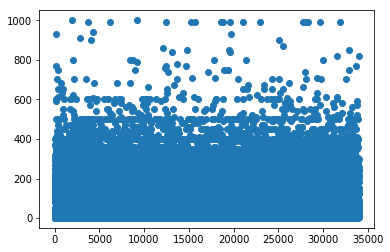

In [144]:
plt.scatter(training['VAR1'], training['VAR12'])
plt.show()

In [145]:
training['VAR12']=training['VAR12'].replace(np.NaN, 0)

In [146]:
z = np.abs(stats.zscore(training['VAR12']))
z

array([0.16692152, 0.57941096, 1.13276356, ..., 0.43033299, 0.55014302,
       0.60594063])

In [147]:
outliers=np.where(z >6)

print(outliers)

(array([  114,   126,  1996,  2093,  2878,  3734,  4038,  4286,  6148,
        8404,  8757,  9198,  9247, 12145, 12453, 12502, 13129, 13647,
       14685, 14836, 15232, 15645, 17773, 18583, 18830, 19517, 19604,
       19622, 19750, 21035, 21368, 23001, 25126, 25471, 27797, 28072,
       28295, 29626, 29960, 31563, 31834, 32854, 33696, 33961],
      dtype=int64),)


In [148]:
for i in outliers:
    print(training['VAR12'].loc[i])

114       770.642202
126       930.775646
1996     1000.000000
2093      800.667223
2878      910.758966
3734      990.825688
4038      900.750626
4286      940.783987
6148      990.825688
8404      800.667223
8757      800.667223
9198      790.658882
9247     1000.000000
12145     860.717264
12453     990.825688
12502     770.642202
13129     840.700584
13647     780.650542
14685     770.642202
14836     850.708924
15232     990.825688
15645     990.825688
17773     800.667223
18583     990.825688
18830     990.825688
19517     850.708924
19604     990.825688
19622     840.700584
19750     930.775646
21035     990.825688
21368     800.667223
23001     990.825688
25126     900.750626
25471     870.725605
27797     990.825688
28072     990.825688
28295     990.825688
29626     990.825688
29960     800.667223
31563     821.517932
31834     990.825688
32854     850.708924
33696     770.642202
33961     820.683903
Name: VAR12, dtype: float64


In [149]:
training['VAR12'].loc[outliers] = np.nan

In [150]:
training['VAR12'].isnull().sum()

training['VAR12']=training['VAR12'].replace(np.NaN, training['VAR12'].mean())

training['VAR12']=training['VAR12'].replace(0, training['VAR12'].mean())

# VAR 13

In [151]:
training['VAR13'].describe()

count    25478.000000
mean        11.679589
std         11.063966
min          0.082667
25%          5.666667
50%         10.000000
75%         15.333333
max        775.000000
Name: VAR13, dtype: float64

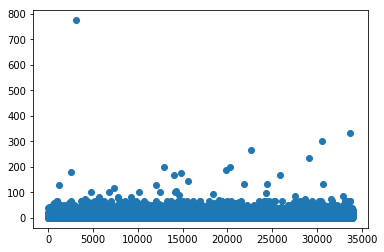

In [152]:
plt.scatter(training['VAR1'], training['VAR13'])
plt.show()

In [153]:
training['VAR13']=training['VAR13'].replace(np.NaN, 0)

z = np.abs(stats.zscore(training['VAR13']))
z

outliers=np.where(z >10)

print(outliers)

(array([ 1205,  2572,  3128, 12052, 12882, 14037, 14866, 15646, 19892,
       20330, 21834, 22611, 24430, 25921, 29095, 30616, 30641, 33652],
      dtype=int64),)


In [154]:
for i in outliers:
    print(training['VAR13'].loc[i])

1205     130.733333
2572     180.000000
3128     775.000000
12052    130.604000
12882    200.000000
14037    166.666667
14866    175.052000
15646    146.666667
19892    188.093333
20330    200.000000
21834    133.333333
22611    266.666667
24430    133.333333
25921    166.666667
29095    233.333333
30616    300.000000
30641    133.333333
33652    333.333333
Name: VAR13, dtype: float64


In [155]:
training['VAR13'].loc[outliers] = np.nan

In [156]:
training['VAR13'].isnull().sum()

training['VAR13']=training['VAR13'].replace(np.NaN, training['VAR13'].mean())

training['VAR13']=training['VAR13'].replace(0, training['VAR13'].mean())

# VAR14

In [157]:
training['VAR14'].unique()

array(['1', '.', '2', '3', '6', '5', '0', '4', '7', '9', '8', '10', '22',
       '12', '15', '14', '18', '20', '11', '104', '23'], dtype=object)

In [ ]:
training['VAR14']=training['VAR14'].replace('.', '120')

In [ ]:
training['VAR14']=training['VAR14'].astype(int)

In [ ]:
plt.scatter(training['VAR1'], training['VAR14'])
plt.show()

In [159]:
z = np.abs(stats.zscore(training['VAR14']))
z

outliers=np.where(z >15)

print(outliers)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
for i in outliers:
    print(training['VAR14'].loc[i])

In [ ]:
training['VAR14'].loc[outliers] = np.nan

In [160]:
training['VAR14']=training['VAR14'].replace(np.NaN, 1)

In [161]:
training['VAR14']=training['VAR14'].replace(120, 1)

# VAR21

In [162]:
training['VAR21']=training['VAR21'].replace(to_replace =["Low"], value ="1")
training['VAR21']=training['VAR21'].replace(to_replace =["Medium"], value ="2")
training['VAR21']=training['VAR21'].replace(to_replace =["High"], value ="3")

In [163]:
training['VAR21']=training['VAR21'].replace(to_replace =[1], value =0)
training['VAR21']=training['VAR21'].replace(to_replace =[2], value =1)
training['VAR21']=training['VAR21'].replace(to_replace =[3], value =2)

In [164]:
training.dtypes

VAR1       int64
VAR2     float64
VAR3     float64
VAR4     float64
VAR5     float64
VAR6     float64
VAR7     float64
VAR10    float64
VAR11    float64
VAR12    float64
VAR13    float64
VAR14     object
VAR18      int64
VAR19      int64
VAR20    float64
VAR21     object
dtype: object

In [165]:
training.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR10,VAR11,VAR12,VAR13,VAR14,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,58.632548,0.279273,100.083403,1.000000,1,1,0,100.104991,1
1,2,911.764706,0.027778,206.916103,611.574748,8.181818,1.344479,56.497320,2.098360,15.012510,8.639273,1,0,1,146.654045,3
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,58.632548,0.453212,210.175146,10.000000,1,0,0,98.249570,2
3,4,892.941177,0.138889,253.286936,638.076431,9.090909,0.820218,58.632548,2.098360,80.000282,8.639273,1,1,0,140.862306,1
4,5,914.117647,0.083333,201.119749,626.514988,5.181818,1.372928,58.632548,2.098360,210.175146,8.639273,.,1,0,101.268503,3


# VAR1

In [166]:
training.drop(columns=['VAR1'], inplace=True)

# Save Training

In [167]:
export_csv = training.to_csv (r'training.csv', index = None, header=True)

In [168]:
training = pd.read_csv('training.csv')

# Model

In [169]:
training = training.values

In [170]:
training

array([[828.2352941, 0.13888888900000002, 321.4285713999999, ..., 0,
        100.10499140000002, 1],
       [911.7647059, 0.027777778, 206.9161030261666, ..., 1, 146.6540448,
        3],
       [962.3529412, 0.833333333, 35.71428571, ..., 0, 98.24956971, 2],
       ...,
       [976.4705882, 0.166666667, 35.71428571, ..., 0, 108.767642, 1],
       [785.8823529, 0.17723333300000002, 1000.0, ..., 0, 101.4716007, 1],
       [917.6470588, 0.13888888900000002, 428.5714286000001, ..., 0,
        52.58864028, 3]], dtype=object)

In [174]:
X = training[:,0:14]
Y = training[:,14]

In [175]:
Y

array([1, 3, 2, ..., 1, 1, 3], dtype=object)

In [177]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
Y = le.fit_transform(Y)
Y = ohe.fit_transform(Y.reshape(-1,1))
Y

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [960]:
# from keras.utils import to_categorical
# Y=to_categorical(Y)

In [976]:
Y.shape

(34000, 3)

In [977]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [978]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [979]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(32, activation='relu', input_shape=(14,)),
                    Dense(32, activation='relu'), 
                    Dense(3, activation='softmax'),])

In [980]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [981]:
hist = model.fit(X_train, Y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, Y_val))

Train on 23800 samples, validate on 5100 samples
Epoch 1/100
23800/23800 [==============================] - 2s 70us/step - loss: 0.9400 - acc: 0.5405 - val_loss: 0.9318 - val_acc: 0.5480
Epoch 2/100
23800/23800 [==============================] - 1s 44us/step - loss: 0.9266 - acc: 0.5505 - val_loss: 0.9246 - val_acc: 0.5486
Epoch 3/100
23800/23800 [==============================] - 1s 40us/step - loss: 0.9222 - acc: 0.5503 - val_loss: 0.9261 - val_acc: 0.5396
Epoch 4/100
23800/23800 [==============================] - 1s 49us/step - loss: 0.9193 - acc: 0.5539 - val_loss: 0.9220 - val_acc: 0.5522
Epoch 5/100
23800/23800 [==============================] - 1s 43us/step - loss: 0.9162 - acc: 0.5568 - val_loss: 0.9163 - val_acc: 0.5520
Epoch 6/100
23800/23800 [==============================] - 1s 42us/step - loss: 0.9145 - acc: 0.5564 - val_loss: 0.9170 - val_acc: 0.5539
Epoch 7/100
23800/23800 [==============================] - 1s 43us/step - loss: 0.9119 - acc: 0.5566 - val_loss: 0.9143 - v

In [982]:
model.evaluate(X_test, Y_test)[1]

5100/5100 [==============================] - 0s 19us/step


0.5784313725022708

In [983]:
leaderboard1 = leaderboard.values

In [984]:
predicted=model.predict(leaderboard1)

In [985]:
predicted.shape

(10000, 3)

In [986]:
inv_p = ohe.inverse_transform(predicted)
inv_p = le.inverse_transform(inv_p.astype(int).ravel())
inv_p

array([2., 2., 1., ..., 0., 1., 0.])

In [987]:
len(inv_p)

10000

In [988]:
p=[]
for i in inv_p:
    if i==2:
        p.append('High')
    elif(i==1):
        p.append('Medium')
    elif(i==0):
        p.append('Low')

In [989]:
len(p)

10000

In [991]:
df=pd.DataFrame()

l=pd.read_csv('leaderboard_dataset.csv')

df['app_key']=l['VAR1']
df['VAR1']=p

In [992]:
df

,app_key,VAR1
0,1,High
1,2,High
2,3,Medium
3,4,High
4,5,Medium
5,6,Low
6,7,Medium
7,8,Medium
8,9,Medium
9,10,Low


In [993]:
export_csv = df.to_csv (r'inseed_IITRoorkee_2.csv', index = None, header=False)

# leaderboard

In [902]:
leaderboard=pd.read_csv('leaderboard_dataset.csv')

In [903]:
def data(training):
    training['VAR5'].describe()

    training['VAR5'].median()

    #replacing var5 by mean value
    training['VAR5']=training['VAR5'].replace(np.NaN, training['VAR5'].mean())

    # Drop  Var 8 and 16 by correlation with 7

    training.drop(columns=['VAR8', 'VAR16'], inplace=True)

    # Drop  Var15 by correlation with 11 and 13

    training.drop(columns=['VAR15'], inplace=True)

    # FIlling VAR10 with mean value

    #replacing var10 by mean value
    training['VAR10']=training['VAR10'].replace(np.NaN, training['VAR10'].mean())

    # Replacing outliers of VAR10

    z = np.abs(stats.zscore(training['VAR10']))

    outliers=np.where(z >3)

    print(outliers)

    training['VAR10'].loc[outliers] = np.nan

    training['VAR10'].isnull().sum()

    training['VAR10']=training['VAR10'].replace(np.NaN, training['VAR10'].mean())

    # Filling missing of VAR11

    training['VAR11'].median()

    training['VAR11']=training['VAR11'].replace(np.NaN, training['VAR11'].median())

    # Replacing outliers of VAR11

    z = np.abs(stats.zscore(training['VAR11']))
    z

    outliers=np.where(z >3)

    print(outliers)

    for i in outliers:
        print(training['VAR11'].loc[i])

    training['VAR11'].loc[outliers] = np.nan

    training['VAR11'].isnull().sum()

    training['VAR11']=training['VAR11'].replace(np.NaN, training['VAR11'].mean())

    # Filling missing of VAR2

    training['VAR2'].mean()

    training['VAR2']=training['VAR2'].replace(np.NaN, training['VAR2'].mean())

    # Filling missing VAR4 using VAR2,11 and training

    training['VAR11'].describe()

    X = training[['VAR2','VAR4','VAR11']].dropna()
    y = X[['VAR4']]
    X = X.drop(columns=['VAR4'])

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

    from sklearn.linear_model import LinearRegression
    lreg = LinearRegression()
    lreg.fit(X_train, y_train)

    y_pred = lreg.predict(X_test)

    from sklearn.metrics import mean_squared_error
    mean_squared_error(y_test,y_pred)

    null_var4=training['VAR4'].isnull()
    null_var4

    x=training[['VAR2', 'VAR11']]
    y=lreg.predict(x)

    y.mean()

    training['VAR4'].mean()

    x=training[['VAR2', 'VAR11']]
    y=lreg.predict(x)
    for i in range (len(null_var4)):
        if null_var4[i]==True:
            training['VAR4'].loc[i]=y[i]

    training['VAR4'].describe()

    # VAR3

    training["VAR3"].describe()

    training["VAR3"].mean()

    training['VAR3']=training['VAR3'].replace(np.NaN, 0)
    #np.NaN, training['VAR3'].mean()

    plt.scatter(training['VAR1'], training['VAR3'])
    plt.show()

    z = np.abs(stats.zscore(training['VAR3']))
    z

    outliers=np.where(z >3)

    print(outliers)

    for i in outliers:
        print(training['VAR3'].loc[i])

    training['VAR3'].loc[outliers] = np.nan

    training['VAR3'].isnull().sum()

    training['VAR3']=training['VAR3'].replace(np.NaN, training['VAR3'].median())

    training['VAR3']=training['VAR3'].replace(0, training['VAR3'].median())

    # VAR6

    #for outlier analysis wrto other factors as well

    training['VAR6'].describe()

    training['VAR6'].median()

    plt.scatter(training['VAR1'], training['VAR6'])
    plt.show()

    training['VAR6']=training['VAR6'].replace(np.NaN, 0)

    z = np.abs(stats.zscore(training['VAR6']))
    z

    outliers=np.where(z >6)

    print(outliers)

    for i in outliers:
        print(training['VAR6'].loc[i])

    training['VAR6'].loc[outliers] = np.nan

    training['VAR6'].isnull().sum()

    training['VAR6']=training['VAR6'].replace(np.NaN, training['VAR6'].median())

    training['VAR6']=training['VAR6'].replace(0, training['VAR6'].median())

    # VAR7

    plt.scatter(training['VAR1'], training['VAR7'])
    plt.show()

    training['VAR7'].median()

    training['VAR7']=training['VAR7'].replace(np.NaN, 0)

    z = np.abs(stats.zscore(training['VAR6']))
    z

    outliers=np.where(z >4)

    print(outliers)

    for i in outliers:
        print(training['VAR7'].loc[i])

    training['VAR7'].loc[outliers] = np.nan

    training['VAR7'].isnull().sum()

    training['VAR7']=training['VAR7'].replace(np.NaN, training['VAR7'].mean())

    training['VAR7']=training['VAR7'].replace(0, training['VAR7'].mean())

    # VAR17

    training.drop(columns=['VAR17'], inplace=True)

    # VAR9

    #check with training by var10

    training.drop(columns=['VAR9'], inplace=True)

    # VAR12

    training['VAR12'].describe()

    training['VAR12'].median()

    plt.scatter(training['VAR1'], training['VAR12'])
    plt.show()

    training['VAR12']=training['VAR12'].replace(np.NaN, 0)

    z = np.abs(stats.zscore(training['VAR12']))
    z

    outliers=np.where(z >6)

    print(outliers)

    for i in outliers:
        print(training['VAR12'].loc[i])

    training['VAR12'].loc[outliers] = np.nan

    training['VAR12'].isnull().sum()

    training['VAR12']=training['VAR12'].replace(np.NaN, training['VAR12'].mean())

    training['VAR12']=training['VAR12'].replace(0, training['VAR12'].mean())

    # VAR 13

    training['VAR13'].describe()

    plt.scatter(training['VAR1'], training['VAR13'])
    plt.show()

    training['VAR13']=training['VAR13'].replace(np.NaN, 0)

    z = np.abs(stats.zscore(training['VAR13']))
    z

    outliers=np.where(z >10)

    print(outliers)

    for i in outliers:
        print(training['VAR13'].loc[i])

    training['VAR13'].loc[outliers] = np.nan

    training['VAR13'].isnull().sum()

    training['VAR13']=training['VAR13'].replace(np.NaN, training['VAR13'].mean())

    training['VAR13']=training['VAR13'].replace(0, training['VAR13'].mean())

    # VAR14

    training['VAR14'].unique()
    print("olaaaaaaaaa")
    training['VAR14']=training['VAR14'].replace('.', '120')
    print("hlaaaaaaaaa")
    training['VAR14']=training['VAR14'].astype(int)

    plt.scatter(training['VAR1'], training['VAR14'])
    plt.show()

    z = np.abs(stats.zscore(training['VAR14']))
    z

    outliers=np.where(z >15)

    print(outliers)

    for i in outliers:
        print(training['VAR14'].loc[i])

    training['VAR14'].loc[outliers] = np.nan

    training['VAR14']=training['VAR14'].replace(np.NaN, 1)

    training['VAR14']=training['VAR14'].replace(120, 1)
    
    training.drop(columns=['VAR1'], inplace=True)

(array([1012, 4067, 6922, 9088], dtype=int64),)
(array([  46,  484,  520,  575,  811,  865,  892,  914, 1101, 1275, 1286,
       1579, 1605, 1776, 1802, 1957, 1986, 2055, 2184, 2261, 2340, 2410,
       2500, 2729, 2777, 2895, 3106, 3124, 3246, 3281, 3290, 3291, 3703,
       4122, 4196, 4489, 4536, 4548, 4595, 4628, 5007, 5144, 5396, 5723,
       5805, 5859, 5932, 6522, 6589, 6628, 6647, 6815, 6836, 6978, 6991,
       7012, 7133, 7275, 7294, 7500, 7885, 8180, 8725, 8756, 9097, 9508,
       9539, 9600, 9685, 9712, 9795, 9960], dtype=int64),)
46        65.004102
484       83.012712
520       69.340112
575       90.212137
811       46.081445
865       54.635656
892       59.948775
914       65.117752
1101      43.799444
1275     131.464860
1286      57.969608
1579      44.400263
1605      44.273446
1776      45.597741
1802      60.951524
1957      59.625150
1986      49.525582
2055      55.061842
2184      51.434064
2261      62.533610
2340     114.246254
2410      45.391925
2500      46.7

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


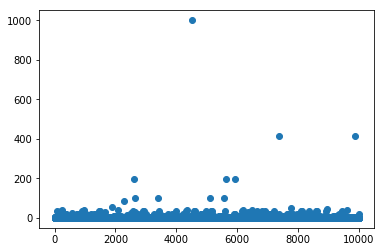

(array([ 235,  981, 1885, 2292, 2598, 2657, 3413, 4348, 4502, 5112, 5562,
       5644, 5942, 6198, 6499, 7364, 7757, 8962, 9886], dtype=int64),)
235       41.666667
981       41.666667
1885      55.555556
2292      83.333333
2598     194.444444
2657     100.000000
3413     100.000000
4348      41.666667
4502    1000.000000
5112     100.000000
5562     101.565556
5644     194.444444
5942     194.444444
6198      41.666667
6499      41.666667
7364     416.666667
7757      50.166667
8962      44.444444
9886     416.666667
Name: VAR3, dtype: float64


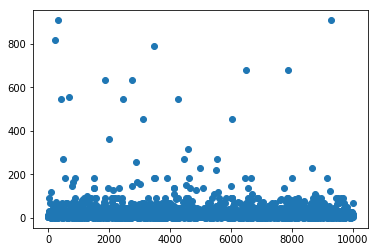

(array([ 215,  332,  430,  482,  673, 1878, 1983, 2466, 2746, 2895, 3108,
       3468, 4274, 4466, 4605, 4978, 5498, 5529, 6030, 6492, 7869, 8650,
       9293], dtype=int64),)
215     818.181818
332     909.090818
430     545.454545
482     272.727273
673     554.555454
1878    636.363636
1983    363.636364
2466    545.454545
2746    636.363636
2895    259.090909
3108    454.545455
3468    790.909091
4274    545.454545
4466    272.727273
4605    318.181818
4978    227.272727
5498    218.181818
5529    272.727273
6030    454.545455
6492    681.818182
7869    681.818182
8650    227.272727
9293    909.090818
Name: VAR6, dtype: float64


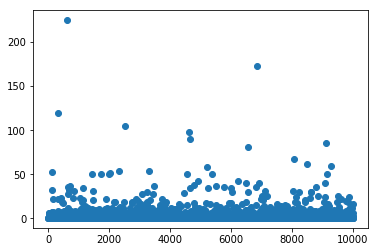

(array([  18,   81,  240,  538,  791,  811,  835,  872,  875, 1118, 1174,
       1183, 1232, 1275, 1307, 1318, 1418, 1487, 1491, 1514, 1524, 1580,
       1833, 1854, 1868, 1975, 2086, 2103, 2104, 2130, 2140, 2142, 2187,
       2302, 2323, 2409, 2428, 2760, 2924, 3002, 3281, 3489, 3512, 3551,
       3831, 3898, 4121, 4128, 4139, 4187, 4248, 4424, 4521, 4525, 4574,
       4607, 4652, 4712, 4856, 5068, 5367, 5457, 5580, 5620, 5763, 5834,
       5997, 6015, 6029, 6034, 6035, 6225, 6476, 6566, 6570, 6634, 6666,
       6684, 6707, 6857, 6902, 7052, 7441, 7616, 7629, 7752, 7800, 7830,
       7871, 7971, 8017, 8118, 8209, 8289, 8405, 8698, 8748, 8790, 8842,
       8962, 9148, 9266, 9466, 9512, 9525, 9602, 9630, 9678], dtype=int64),)
18       2.634576
81       0.782077
240      6.580284
538      2.581884
791      0.777866
811     23.391951
835      1.372441
872      1.719569
875      0.559710
1118     0.763663
1174     2.706337
1183     0.656017
1232     0.969099
1275     3.363374
1307     4.34

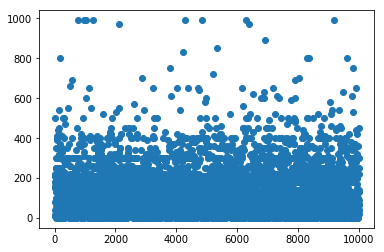

(array([ 184,  757,  984, 1021, 1262, 2104, 4217, 4279, 4848, 5353, 6276,
       6400, 6929, 8296, 8365, 9178, 9596], dtype=int64),)
184     800.667223
757     990.825688
984     990.825688
1021    990.825688
1262    990.825688
2104    970.809007
4217    830.692243
4279    990.825688
4848    990.825688
5353    850.708924
6276    990.825688
6400    970.809007
6929    890.742285
8296    800.667223
8365    800.667223
9178    990.825688
9596    800.667223
Name: VAR12, dtype: float64


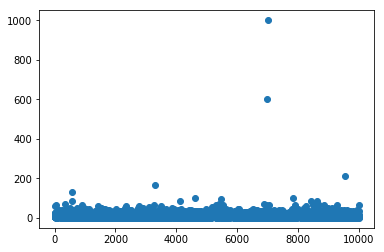

(array([3291, 6991, 7012, 9539], dtype=int64),)
3291     166.666667
6991     600.000000
7012    1000.000000
9539     213.333333
Name: VAR13, dtype: float64
olaaaaaaaaa
hlaaaaaaaaa


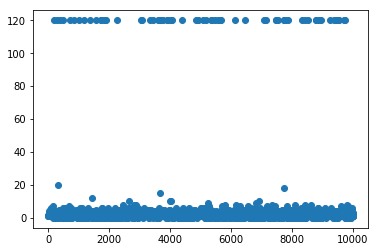

(array([], dtype=int64),)
Series([], Name: VAR14, dtype: int32)


In [904]:
data(leaderboard)

In [905]:
leaderboard.head()

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR10,VAR11,VAR12,VAR13,VAR14,VAR18,VAR19,VAR20
0,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,58.632548,9.433609,40.033361,10.000000,2.0,1,0,48.099828
1,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,58.632548,10.144612,76.601950,5.666667,1.0,0,0,104.018933
2,955.294118,0.055556,92.971685,611.574748,6.363636,0.918652,56.432554,0.583494,76.601950,6.000000,1.0,1,1,120.586919
3,831.764706,0.111111,250.000000,617.740617,6.545455,2.383924,48.539365,2.105289,76.601950,8.739535,3.0,0,1,168.592083
4,957.647059,0.166667,85.295107,623.426802,9.090909,0.711240,49.379748,0.255712,76.601950,13.333333,1.0,0,1,109.204819


In [906]:
leaderboard['VAR14'].unique()

array([ 2.,  1.,  3.,  4.,  5.,  6.,  0.,  7., 20., 12.,  8., 10., 15.,
        9., 18.])

# Compare VAR2 and VAR5

In [278]:
a = np.asarray(training['VAR1'])
b = np.asarray(training['VAR10'])

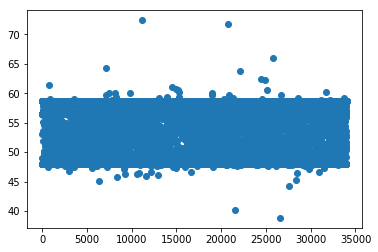

In [279]:
plt.scatter(a,b)
plt.show()

In [97]:
len(training['VAR10'].unique().tolist())

3692

In [98]:
training['VAR10'].describe()

count    29450.000000
mean        56.497320
std          6.861058
min         13.028620
25%         57.458373
50%         58.632548
75%         58.632548
max       1000.000000
Name: VAR10, dtype: float64

# Checking correlation

In [132]:
training.corr(method ='pearson')

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR17,VAR18,VAR19,VAR20
VAR1,1.000000,0.011837,0.006198,-0.007011,0.001173,-0.008698,0.008529,0.013443,-0.012433,-0.006675,-0.004072,-0.005051,-0.005648,-0.006405,-0.010924,0.000523,-0.000604
VAR2,0.011837,1.000000,0.001972,-0.520364,-0.198789,0.024563,-0.027956,-0.005974,0.044978,-0.170889,0.145806,0.131859,0.100009,-0.171372,0.062919,-0.064833,-0.103261
VAR3,0.006198,0.001972,1.000000,-0.006435,0.007076,0.026434,0.018932,0.005590,-0.000101,0.008638,0.077644,0.017939,0.016350,-0.014700,0.013064,0.004490,0.018308
VAR4,-0.007011,-0.520364,-0.006435,1.000000,0.209707,-0.026012,0.016341,0.014895,-0.033471,0.199767,-0.100896,-0.079159,-0.042410,0.172705,-0.037142,0.115342,0.050940
VAR5,0.001173,-0.198789,0.007076,0.209707,1.000000,0.028062,0.075235,0.155088,0.141205,0.081221,-0.054978,-0.050700,-0.036232,0.102895,0.034296,-0.130858,0.229491
VAR6,-0.008698,0.024563,0.026434,-0.026012,0.028062,1.000000,0.092884,-0.019285,0.136964,0.052466,0.032335,0.132180,0.119386,-0.056091,0.049143,0.083432,0.073296
VAR7,0.008529,-0.027956,0.018932,0.016341,0.075235,0.092884,1.000000,-0.034977,-0.036209,0.065382,-0.005929,0.067227,0.065214,-0.019672,0.024797,0.115910,0.113370
VAR9,0.013443,-0.005974,0.005590,0.014895,0.155088,-0.019285,-0.034977,1.000000,0.131755,-0.011615,0.015459,0.010221,0.005955,-0.034184,0.007195,-0.218252,-0.031862
VAR10,-0.012433,0.044978,-0.000101,-0.033471,0.141205,0.136964,-0.036209,0.131755,1.000000,-0.051732,0.031744,-0.019574,-0.027619,-0.017345,0.018898,-0.248395,-0.021122
VAR11,-0.006675,-0.170889,0.008638,0.199767,0.081221,0.052466,0.065382,-0.011615,-0.051732,1.000000,0.029827,0.491042,0.639427,0.103471,0.026608,0.079181,0.076796


In [133]:
training.corr(method ='kendall')

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR17,VAR18,VAR19,VAR20
VAR1,1.000000,0.007786,-0.004915,-0.004202,0.004459,-0.003373,0.003125,0.005023,-0.004623,-0.006895,-0.004218,-0.003457,-0.006174,0.000544,-0.006411,0.000427,0.001181
VAR2,0.007786,1.000000,0.025121,-0.404697,-0.058046,0.054754,-0.017299,-0.003521,0.068873,-0.140589,0.114073,0.155969,0.125533,-0.123870,0.062244,-0.054636,-0.015427
VAR3,-0.004915,0.025121,1.000000,0.006938,0.010705,0.207954,0.127728,-0.023809,-0.039367,0.108341,0.221032,0.129637,0.135273,-0.043671,0.111168,0.091868,0.071073
VAR4,-0.004202,-0.404697,0.006938,1.000000,0.060454,-0.034902,0.002534,-0.003744,-0.070565,0.196050,-0.067889,-0.120143,-0.077769,0.132834,-0.042419,0.109937,-0.071832
VAR5,0.004459,-0.058046,0.010705,0.060454,1.000000,0.010727,0.333036,0.076251,0.333449,0.003948,-0.035263,-0.044831,-0.038402,0.042503,0.033930,-0.262699,0.087013
VAR6,-0.003373,0.054754,0.207954,-0.034902,0.010727,1.000000,0.200657,-0.029803,-0.069150,0.102740,0.035187,0.219850,0.223951,-0.057857,0.068108,0.127835,0.119637
VAR7,0.003125,-0.017299,0.127728,0.002534,0.333036,0.200657,1.000000,-0.152248,0.012691,0.010047,-0.003945,0.077752,0.077090,0.000660,0.065733,0.201671,0.183081
VAR9,0.005023,-0.003521,-0.023809,-0.003744,0.076251,-0.029803,-0.152248,1.000000,0.184847,-0.000690,0.010116,0.008520,0.009888,-0.018879,-0.010767,-0.183708,-0.066377
VAR10,-0.004623,0.068873,-0.039367,-0.070565,0.333449,-0.069150,0.012691,0.184847,1.000000,-0.058771,0.009973,-0.015168,-0.024185,-0.013207,0.051740,-0.542035,-0.026410
VAR11,-0.006895,-0.140589,0.108341,0.196050,0.003948,0.102740,0.010047,-0.000690,-0.058771,1.000000,0.033766,0.194532,0.278028,0.039654,0.038183,0.075997,0.026343


In [3]:
corr = training.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
VAR1,1,0.0118372,0.00619793,-0.00701086,0.00117306,-0.00869824,0.00852904,0.00314015,0.013443,-0.0124325,-0.00667528,-0.00407248,-0.0050507,-0.00564841,0.00782759,-0.00640529,-0.010924,0.000523303,-0.000603598
VAR2,0.0118372,1,0.00197205,-0.520364,-0.198825,0.0245633,-0.0279555,-0.0498482,-0.00597435,0.0449777,-0.170889,0.145806,0.131859,0.100009,-0.0245627,-0.171372,0.0629191,-0.0648333,-0.103261
VAR3,0.00619793,0.00197205,1,-0.0064346,0.00707567,0.0264341,0.0189318,0.0255692,0.00558978,-0.000101037,0.00863816,0.0776437,0.0179392,0.0163499,0.0160329,-0.0147,0.0130643,0.00448966,0.0183075
VAR4,-0.00701086,-0.520364,-0.0064346,1,0.209725,-0.0260116,0.0163415,0.0636066,0.0148954,-0.0334715,0.199767,-0.100896,-0.0791587,-0.0424098,0.0158767,0.172705,-0.0371419,0.115342,0.0509397
VAR5,0.00117306,-0.198825,0.00707567,0.209725,1,0.0280617,0.0752354,0.202366,0.155101,0.141205,0.0812207,-0.054978,-0.0507001,-0.0362315,0.0668371,0.102895,0.0342961,-0.130859,0.229492
VAR6,-0.00869824,0.0245633,0.0264341,-0.0260116,0.0280617,1,0.0928843,0.129908,-0.0192852,0.136964,0.0524663,0.0323352,0.13218,0.119386,0.0732318,-0.056091,0.0491434,0.0834319,0.073296
VAR7,0.00852904,-0.0279555,0.0189318,0.0163415,0.0752354,0.0928843,1,0.701303,-0.0349773,-0.0362094,0.0653824,-0.0059291,0.0672269,0.0652139,0.924227,-0.0196715,0.0247965,0.11591,0.11337
VAR8,0.00314015,-0.0498482,0.0255692,0.0636066,0.202366,0.129908,0.701303,1,-0.0269599,-0.0681563,0.131838,0.00150953,0.10331,0.10472,0.492394,0.00488503,0.0410706,0.166366,0.168116
VAR9,0.013443,-0.00597435,0.00558978,0.0148954,0.155101,-0.0192852,-0.0349773,-0.0269599,1,0.131755,-0.011615,0.0154587,0.0102215,0.00595463,-0.027507,-0.0341845,0.00719541,-0.218252,-0.0318616
VAR10,-0.0124325,0.0449777,-0.000101037,-0.0334715,0.141205,0.136964,-0.0362094,-0.0681563,0.131755,1,-0.051732,0.0317439,-0.0195737,-0.0276187,-0.0272063,-0.017345,0.0188982,-0.248395,-0.0211219


In [4]:
corr = training.corr(method ='kendall')
corr.style.background_gradient(cmap='coolwarm')

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
VAR1,1,0.00778572,-0.00491505,-0.00420163,0.00446694,-0.00337346,0.00312546,0.00523055,0.00502265,-0.00462289,-0.00689517,-0.00421813,-0.00345651,-0.00617367,0.00417357,0.000544376,-0.00641052,0.000427281,0.00118141
VAR2,0.00778572,1,0.0251206,-0.404697,-0.058026,0.0547538,-0.0172995,-0.0459305,-0.00352146,0.0688732,-0.140589,0.114073,0.155969,0.125533,-0.0176658,-0.12387,0.0622437,-0.0546362,-0.0154268
VAR3,-0.00491505,0.0251206,1,0.00693784,0.0107079,0.207954,0.127728,0.130412,-0.0238091,-0.039367,0.108341,0.221032,0.129637,0.135273,0.123725,-0.0436707,0.111168,0.0918683,0.0710727
VAR4,-0.00420163,-0.404697,0.00693784,1,0.0604268,-0.0349017,0.00253422,0.0796496,-0.00374421,-0.0705653,0.19605,-0.0678892,-0.120143,-0.0777692,0.00553562,0.132834,-0.0424193,0.109937,-0.0718318
VAR5,0.00446694,-0.058026,0.0107079,0.0604268,1,0.0107272,0.333034,0.444945,0.0763247,0.333497,0.00394776,-0.0352631,-0.0448311,-0.0384024,0.336171,0.0425034,0.0339413,-0.262696,0.0870381
VAR6,-0.00337346,0.0547538,0.207954,-0.0349017,0.0107272,1,0.200657,0.179923,-0.0298026,-0.0691499,0.10274,0.0351865,0.21985,0.223951,0.190762,-0.0578569,0.0681081,0.127835,0.119637
VAR7,0.00312546,-0.0172995,0.127728,0.00253422,0.333034,0.200657,1,0.752378,-0.152248,0.0126912,0.0100466,-0.0039445,0.0777518,0.07709,0.845808,0.000659796,0.0657334,0.201671,0.183081
VAR8,0.00523055,-0.0459305,0.130412,0.0796496,0.444945,0.179923,0.752378,1,-0.0775324,0.0422038,0.0670846,0.000649851,0.0613097,0.0710585,0.723773,0.0502837,0.0649486,0.184472,0.185219
VAR9,0.00502265,-0.00352146,-0.0238091,-0.00374421,0.0763247,-0.0298026,-0.152248,-0.0775324,1,0.184847,-0.000689979,0.0101155,0.00851983,0.00988806,-0.150233,-0.0188787,-0.0107669,-0.183708,-0.0663769
VAR10,-0.00462289,0.0688732,-0.039367,-0.0705653,0.333497,-0.0691499,0.0126912,0.0422038,0.184847,1,-0.058771,0.00997276,-0.0151681,-0.0241853,0.0204544,-0.0132065,0.0517398,-0.542035,-0.0264104


In [5]:
corr = training.corr(method ='spearman')
corr.style.background_gradient(cmap='coolwarm')

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
VAR1,1,0.0116669,-0.00717901,-0.00601954,0.00655286,-0.00494546,0.00471545,0.00783454,0.00733514,-0.00602328,-0.0103704,-0.00618076,-0.00514193,-0.00917857,0.00626199,0.000704484,-0.00800984,0.000523303,0.00179353
VAR2,0.0116669,1,0.0367863,-0.558507,-0.0848287,0.0800088,-0.0259656,-0.0691953,-0.00518717,0.0891643,-0.208563,0.167439,0.228774,0.184636,-0.0266065,-0.175769,0.0775332,-0.0666746,-0.023921
VAR3,-0.00717901,0.0367863,1,0.00983755,0.0149422,0.289627,0.184732,0.188518,-0.03375,-0.0500413,0.157988,0.311838,0.187266,0.195143,0.178725,-0.0608751,0.134802,0.109769,0.103101
VAR4,-0.00601954,-0.558507,0.00983755,1,0.0856427,-0.0493646,0.00360428,0.114949,-0.0052472,-0.0883192,0.280606,-0.095685,-0.171729,-0.111362,0.00786166,0.184468,-0.0507941,0.129158,-0.0975148
VAR5,0.00655286,-0.0848287,0.0149422,0.0856427,1,0.0154004,0.426633,0.544372,0.10764,0.427396,0.00809397,-0.051397,-0.0646872,-0.0554717,0.432132,0.0591566,0.0413811,-0.314956,0.123776
VAR6,-0.00494546,0.0800088,0.289627,-0.0493646,0.0154004,1,0.288932,0.260457,-0.0425231,-0.0880461,0.150525,0.0497184,0.313709,0.318917,0.274753,-0.0809758,0.0833869,0.15345,0.174389
VAR7,0.00471545,-0.0259656,0.184732,0.00360428,0.426633,0.288932,1,0.883728,-0.217195,0.0303206,0.01616,-0.00578855,0.115247,0.11427,0.95792,0.000916259,0.0816552,0.246552,0.268403
VAR8,0.00783454,-0.0691953,0.188518,0.114949,0.544372,0.260457,0.883728,1,-0.110113,0.0694389,0.101642,0.00103626,0.0912969,0.105615,0.869255,0.0720519,0.0807711,0.225642,0.269822
VAR9,0.00733514,-0.00518717,-0.03375,-0.0052472,0.10764,-0.0425231,-0.217195,-0.110113,1,0.254018,-0.000848461,0.0144865,0.0122828,0.0142667,-0.212281,-0.0262385,-0.0130647,-0.219324,-0.096811
VAR10,-0.00602328,0.0891643,-0.0500413,-0.0883192,0.427396,-0.0880461,0.0303206,0.0694389,0.254018,1,-0.0767246,0.012661,-0.0194893,-0.0310875,0.0396632,-0.0164698,0.0560532,-0.574909,-0.0343462


In [181]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)

In [182]:
training.corr(method=histogram_intersection)

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR9,VAR10,VAR11,VAR12,VAR13,VAR17,VAR18,VAR19,VAR20
VAR1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAR11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [767]:
training.isnull().sum()

VAR1     0
VAR2     0
VAR3     0
VAR4     0
VAR5     0
VAR6     0
VAR7     0
VAR10    0
VAR11    0
VAR12    0
VAR13    0
VAR14    1
VAR18    0
VAR19    0
VAR20    0
VAR21    0
dtype: int64

# Checking and comparing null values of VAR7 and VAR8

In [123]:
a=training['VAR7'].isnull().tolist()

In [125]:
for i in range(len(a)):
    if(a[i]==True):
        print (i)

29
31
70
119
150
184
292
325
490
505
568
602
610
628
638
641
643
652
691
708
710
742
776
842
852
966
988
1077
1184
1187
1207
1281
1308
1367
1387
1442
1462
1538
1588
1656
1675
1682
1692
1694
1700
1725
1735
1832
1841
1861
1899
1932
1940
1949
2033
2075
2101
2105
2109
2214
2260
2280
2295
2301
2337
2346
2464
2492
2603
2664
2665
2724
2773
2842
2865
2885
2938
2946
3008
3034
3072
3134
3156
3189
3394
3437
3530
3546
3560
3590
3632
3657
3739
3749
3885
3942
3985
4006
4113
4133
4339
4444
4499
4586
4591
4724
4770
4824
4853
4917
4921
4987
5008
5009
5044
5048
5057
5210
5225
5339
5525
5561
5590
5594
5615
5649
5682
5736
5770
5863
5871
5965
5987
6000
6041
6051
6081
6118
6124
6133
6194
6219
6233
6236
6273
6276
6309
6381
6457
6470
6537
6570
6609
6698
6718
6785
6823
6851
6872
6928
6962
7039
7074
7084
7191
7231
7250
7297
7312
7342
7384
7436
7497
7524
7543
7665
7725
7758
7762
7764
7822
7826
7829
7834
7842
7873
7915
7931
7948
8085
8116
8133
8151
8215
8231
8274
8302
8533
8541
8572
8573
8603
8675
8755
8812
8815


In [158]:
b=training['VAR17'].isnull().tolist()

In [159]:
b

[True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 Tr

In [128]:
for i in range(len(b)):
    if(b[i]==True):
        print (i)

29
31
70
119
150
184
292
325
490
505
568
602
610
628
638
641
643
652
691
708
710
742
776
842
852
966
988
1077
1184
1187
1207
1281
1308
1367
1387
1442
1462
1538
1588
1656
1675
1682
1692
1694
1700
1725
1735
1832
1841
1861
1899
1932
1940
1949
2033
2075
2101
2105
2109
2214
2260
2280
2295
2301
2337
2346
2464
2492
2603
2664
2665
2724
2773
2842
2865
2885
2938
2946
3008
3034
3072
3134
3156
3189
3394
3437
3530
3546
3560
3590
3632
3657
3739
3749
3885
3942
3985
4006
4113
4133
4339
4444
4499
4586
4591
4724
4770
4824
4853
4917
4921
4987
5008
5009
5044
5048
5057
5210
5225
5339
5525
5561
5590
5594
5615
5649
5682
5736
5770
5863
5871
5965
5987
6000
6041
6051
6081
6118
6124
6133
6194
6219
6233
6236
6273
6276
6309
6381
6457
6470
6537
6570
6609
6698
6718
6785
6823
6851
6872
6928
6962
7039
7074
7084
7191
7231
7250
7297
7312
7342
7384
7436
7497
7524
7543
7665
7725
7758
7762
7764
7822
7826
7829
7834
7842
7873
7915
7931
7948
8085
8116
8133
8151
8215
8231
8274
8302
8533
8541
8572
8573
8603
8675
8755
8812
8815


# Outlier detection on VAR10

In [373]:
training['VAR11'].min()

0.000692985

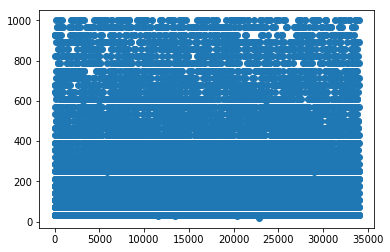

In [428]:
plt.scatter(training['VAR1'], training['VAR4'])
plt.show()

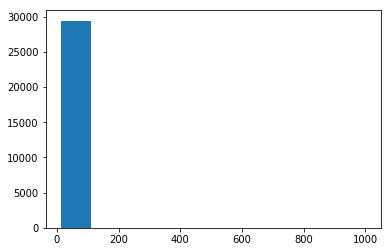

In [189]:
plt.hist(training['VAR10'])
plt.show()

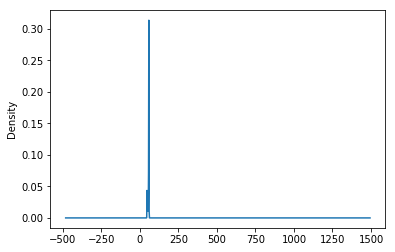

In [175]:
training['VAR10'].plot(kind='density', subplots=True, sharex=False)
plt.show()

In [287]:
#z score

In [429]:
z = np.abs(stats.zscore(training['VAR4']))
print(z)

[nan nan nan ... nan nan nan]


In [290]:
print(np.where(z >3))

(array([ 6369, 11164, 20791, 21502, 26591, 27622], dtype=int64),)


In [270]:
for i in A:
    print(training['VAR10'].loc[i])

1103     56.464941
6149     56.464941
7680     56.464941
17045    56.464941
21825    77.628639
32861    56.464941
Name: VAR10, dtype: float64


# Leaderboard submission

In [36]:
leaderboard=pd.read_csv('leaderboard_dataset.csv')

In [39]:
leaderboard['VAR21']="Medium"

In [74]:
leaderboard.isnull().sum()

VAR1        0
VAR2      267
VAR3      937
VAR4     3686
VAR5        0
VAR6     1058
VAR7      215
VAR8      215
VAR9     4701
VAR10    1348
VAR11    2231
VAR12    3201
VAR13    2493
VAR14       0
VAR15    2359
VAR16     229
VAR17    6543
VAR18       0
VAR19       0
VAR20       0
VAR21       0
dtype: int64

In [44]:
leaderboard['VAR3']=leaderboard['VAR3'].dropna()

In [45]:
leaderboard.shape

(10000, 21)

In [183]:
leaderboard['VAR10'].describe()

count    8652.000000
mean       56.432554
std         4.097975
min         2.101494
25%        57.137997
50%        58.632548
75%        58.632548
max        93.177335
Name: VAR10, dtype: float64

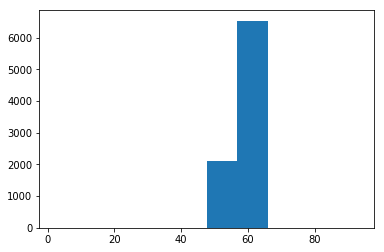

In [186]:
plt.hist(leaderboard['VAR10'])
plt.show()

In [46]:
df=pd.DataFrame()

In [47]:
df['app_key']=leaderboard['VAR1']

In [49]:
df['val1']="Medium"

In [50]:
df.head()

,app_key,val1
0,1,Medium
1,2,Medium
2,3,Medium
3,4,Medium
4,5,Medium


In [51]:
export_csv = df.to_csv (r'inseed_IITRoorkee_1.csv', index = None, header=False)

In [25]:
leaderboard['VAR21'].dtype

dtype('O')